In [2]:
from matplotlib import pyplot as plt
import cv2 as cv
import easyocr
import hashlib
import base64
import qrcode

## Login with SPID - Personal information encryption

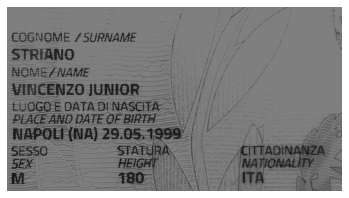

In [3]:
image1 = cv.imread('IMG_8547.jpg', cv.IMREAD_GRAYSCALE)
image1 = cv.medianBlur(image1 ,1)
ret,thre = cv.threshold(image1,127,255,cv.THRESH_TRUNC)
plt.imshow(thre, cmap="gray", vmin=0, vmax=255)
plt.axis('off');

In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext(thre)

info = {result[0][1] : result[1][1],
        result[4][1] : result[7][1],
        result[15][1] : result[19][1]}

info = str(info)
print(info)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


{'COGNOME / SURNAME': 'STRIANO', 'NOMEZ NAME': 'VINCENZO JUNIOR', 'LyOGO E DATA DI NASCITA': 'NAPOLI (NA) 29.05.1999'}


In [5]:
info_hashed = hashlib.sha256(info.encode()).hexdigest()
print("Your encrpyted information are stored in MEDUSA as: "+ str(info_hashed))
del info

Your encrpyted information are stored in MEDUSA as: da5ba28960825fbaa2827aaf9e9d0098d623513481d0a5d3e91121eb96e07229


## Please, scan your finger - Biometric encryption

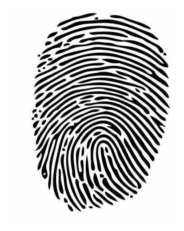

In [6]:
impronta = cv.imread('impronta.png', cv.IMREAD_GRAYSCALE)
plt.imshow(impronta, cmap="gray", vmin=0, vmax=255)
plt.axis('off');

In [7]:
with open("impronta.png", "rb") as image2string:
    bio_hashed = base64.b64encode(image2string.read())

bio_hashed = str(bio_hashed)
bio_hashed = hashlib.sha256(bio_hashed.encode()).hexdigest()

print('Your encrpyted biometrics traces will not be stored in MEDUSA')
del impronta

Your encrpyted biometrics traces will not be stored in MEDUSA


In [8]:
final_hash = str(info_hashed)+str(bio_hashed)
final_hash = hashlib.sha256(final_hash.encode()).hexdigest()
del bio_hashed

print('Your final hash NFTed is: '+final_hash)

Your final hash NFTed is: 635a806aa2b5d06a1ae22764db038dc0a2f402530860477339d920e79433d6c6


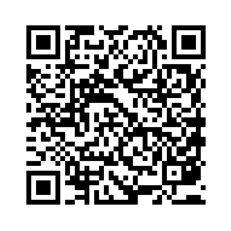

In [9]:
img = qrcode.make(final_hash)
plt.imshow(img, cmap="gray")
plt.axis('off');